# Logistic Regression


**Input** 

- n : the number of data point
- $mx_1$, $vx_1$, $my_1$, $vy_1$, $mx_2$, $vx_2$, $my_2$, $vy_2$

In [128]:

## a. Univariate Gaussian data generator
# - mean: $m$
# - Variance: $s$
# - handcraft gaussian distribution
#     - **Box-Muller transform**
#     - Ziggurat algorithm
# - np.random.uniform()

import numpy as np

def  univariate_Gaussian_data_generator(m,s):
    u1 = np.random.uniform(0,1)
    u2 = np.random.uniform(0,1)
    z = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    x = m + np.sqrt(s) * z
    return x


#print(univariate_Gaussian_data_generator(1.2204925277612,0))

# point = [ ma, va, mb, vb, mc, vc, md, vd]


def generate_data_point(n, point):

    d1x = [univariate_Gaussian_data_generator(point[0], point[1]) for _ in range(n)]
    d2y = [univariate_Gaussian_data_generator(point[2], point[3]) for _ in range(n)]
    d3x = [univariate_Gaussian_data_generator(point[4], point[5]) for _ in range(n)]
    d4y = [univariate_Gaussian_data_generator(point[6], point[7]) for _ in range(n)]

    d1=list(zip(d1x, d2y))
    d2=list(zip(d3x, d4y))


    return d1, d2

def prepare_dataset(D1, D2):
    X = np.array(D1 + D2)
    X = np.hstack([np.ones((X.shape[0], 1)), X])  # 加 bias 項
    y = np.array([0] * len(D1) + [1] * len(D2))
    y = y.reshape(-1, 1)
    return X, y


# logistic_regression(50,[1,1,10,10,2,2,2,2])


In [129]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(X, y, w):
    z = X @ w
    h = sigmoid(z)
    eps = 1e-15  # 防止 log(0)
    return -np.mean(y * np.log(h + eps) + (1 - y) * np.log(1 - h + eps))

def compute_gradient(X, y, w):
    h = sigmoid(X @ w)
    return X.T @ (h - y)

def compute_hessian(X, w):
    h = sigmoid(X @ w)
    S = np.diag((h * (1 - h)).flatten())
    return X.T @ S @ X



def logistic_regression_newtonmethod(X, y, max_iter=1000, tol=1e-6, lr=0.01):
    w = np.zeros((X.shape[1], 1))

    for i in range(max_iter):
        grad = compute_gradient(X, y, w)
        H = compute_hessian(X, w)

        try:
            delta = np.linalg.solve(H, grad)
        except np.linalg.LinAlgError:
            print("Hessian is singular. Falling back to gradient descent.")
            delta = lr * grad  # gradient descent step

        w -= delta
        loss = compute_loss(X, y, w)

        if np.linalg.norm(delta) < tol:
            print(f"Converged in {i+1} iterations. Loss: {loss:.6f}")
            break

    return w

def logistic_regression_gradientdescent(X,y,max_iter=1000, tol=1e-6, lr=0.01):
    w = np.zeros((X.shape[1],1))


    for t in range(max_iter):
        g = compute_gradient(X, y, w)
        w -= g*lr
        if np.linalg.norm(g)<tol:
            break


    return w



def predict(X, w):
    return (sigmoid(X@w) >= 0.5).astype(int)


def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true==1)&(y_pred==1))
    TN = np.sum((y_true==0)&(y_pred==0))
    FP = np.sum((y_true==0)&(y_pred==1))
    FN = np.sum((y_true==1)&(y_pred==0))
    return TP, TN, FP, FN


def evaluate(y_true, y_pred):
    TP, TN, FP, FN = confusion_matrix(y_true, y_pred)
    sensitivity = TP / (TP+FN)
    specificity = TN / (TN+FP)
    accuracy =  (TP+TN)/(TP + TN + FP + FN)

    matrix = f"""
Confusion Matrix:
                 Predict cluster 1   Predict cluster 2
Is cluster 1         {TN:<10}           {FP:<10}
Is cluster 2         {FN:<10}           {TP:<10}

Sensitivity (Successfully predict cluster 2): {sensitivity:.5f}
Specificity (Successfully predict cluster 1): {specificity:.5f}
Accuracy : {accuracy * 100:.2f}%
"""
    print(matrix)




np.random.seed(42)

D1, D2 = generate_data_point(50, [1,1,3,3,2,2,4,4])
D1, D2 = generate_data_point(50, [1,1,10,10,2,2,2,2])
X, y = prepare_dataset(D1, D2)
print("Newton's method:\n\n")
w_n = logistic_regression_newtonmethod(X, y, max_iter=1000, tol=1e-6, lr=0.01)


y_pred_n = predict(X, w_n)
evaluate(y_pred_n.flatten(), y.flatten())



Newton's method:


Hessian is singular. Falling back to gradient descent.
Converged in 44 iterations. Loss: -0.000000

Confusion Matrix:
                 Predict cluster 1   Predict cluster 2
Is cluster 1         50                   0         
Is cluster 2         0                    50        

Sensitivity (Successfully predict cluster 2): 1.00000
Specificity (Successfully predict cluster 1): 1.00000
Accuracy : 100.00%



C:\Users\yuchu\AppData\Local\Temp\ipykernel_13628\4148668593.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [130]:
print("Gradient descent:\n\n")
w_gd = logistic_regression_gradientdescent(X, y, max_iter=1000, tol=1e-6, lr=0.01)
y_pred_gd = predict(X, w_gd)

evaluate(y_pred_gd.flatten(), y.flatten())

Gradient descent:



Confusion Matrix:
                 Predict cluster 1   Predict cluster 2
Is cluster 1         50                   0         
Is cluster 2         0                    50        

Sensitivity (Successfully predict cluster 2): 1.00000
Specificity (Successfully predict cluster 1): 1.00000
Accuracy : 100.00%



C:\Users\yuchu\AppData\Local\Temp\ipykernel_13628\4148668593.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


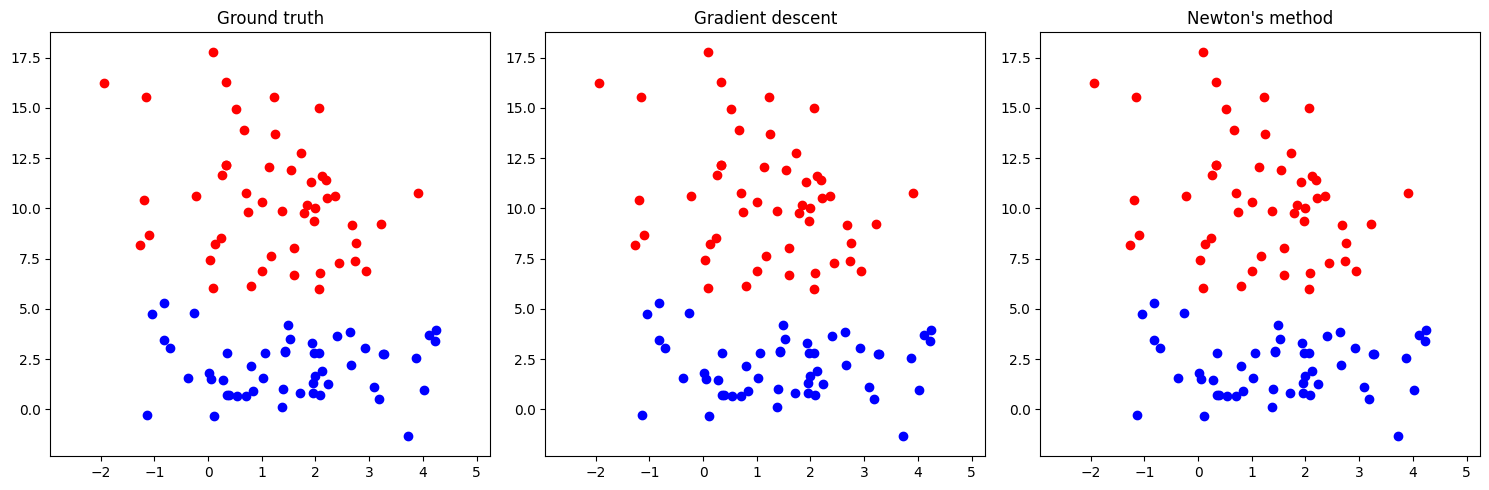

In [131]:
import matplotlib.pyplot as plt

def plot_results(X, y_true, w_gd, w_n):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Ground Truth
    axs[0].scatter(X[y_true.flatten() == 0][:, 1], X[y_true.flatten() == 0][:, 2], color='red')
    axs[0].scatter(X[y_true.flatten() == 1][:, 1], X[y_true.flatten() == 1][:, 2], color='blue')
    axs[0].set_title("Ground truth")

    # Gradient Descent Prediction
    y_pred_gd = predict(X, w_gd)
    axs[1].scatter(X[y_pred_gd.flatten() == 0][:, 1], X[y_pred_gd.flatten() == 0][:, 2], color='red')
    axs[1].scatter(X[y_pred_gd.flatten() == 1][:, 1], X[y_pred_gd.flatten() == 1][:, 2], color='blue')
    axs[1].set_title("Gradient descent")

    # Newton Method Prediction
    y_pred_n = predict(X, w_n)
    axs[2].scatter(X[y_pred_n.flatten() == 0][:, 1], X[y_pred_n.flatten() == 0][:, 2], color='red')
    axs[2].scatter(X[y_pred_n.flatten() == 1][:, 1], X[y_pred_n.flatten() == 1][:, 2], color='blue')
    axs[2].set_title("Newton's method")

    for ax in axs:
        ax.set_xlim(X[:, 1].min() - 1, X[:, 1].max() + 1)
        ax.set_ylim(X[:, 2].min() - 1, X[:, 2].max() + 1)

    plt.tight_layout()
    plt.show()

# 呼叫繪圖
plot_results(X, y, w_gd, w_n)


# EM Algorithm